In [42]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [43]:
%matplotlib inline

### Line plot

In [44]:
ts = np.linspace(0,16*np.pi,1000)
xs = np.sin(ts)
ys = np.cos(ts)
zs = ts

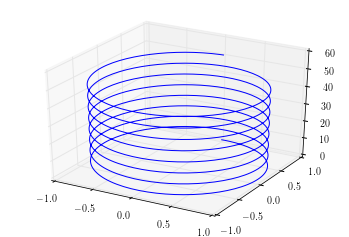

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot(xs,ys,zs, zdir = 'z')

Esta es la manera "canónica" de generar una gráfica en la que habrá una curva en $\mathbb{R}^3$. Las xs, ys, zs son las coordenadas de la curva, en este caso están dadas por arreglos de numpy. zdir hace alusión a la dirección que se considerará como la dirección z en caso de introducir una gráfica 2D en esta misma.

### Scatter Plot

De igual forma podemos generar una gráfica constituída por puntos; se le denomina "scatter"

In [46]:
ts = np.linspace(0,8*np.pi,1000)
xs = np.sin(ts)
ys = np.cos(ts)
zs = ts

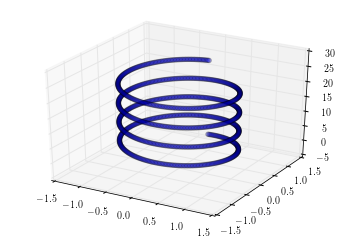

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(xs,ys,zs, zdir = 'z', alpha = 0.3)

### Wireframe Plot

En este caso necesitamos arreglos bidimensionales para las xs y las ys, para ello usamos la función meshgrid, de la siguiente forma

In [48]:
x = np.linspace(-1.5,1.5,100)
y = np.linspace(-1.5,1.5,100)
Xs, Ys = np.meshgrid(x,y)

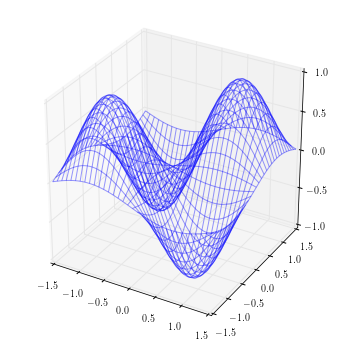

In [49]:
Zs = np.sin(2*Xs)*np.sin(2*Ys)
fig = plt.figure(figsize=(5.9,5.9))
ax = fig.add_subplot(111, projection ='3d')
ax.plot_wireframe(Xs,Ys,Zs, rstride=3, cstride=3, alpha = 0.4)

In [51]:
#plt.figure?

### Quiver Plot

(-1, 1)

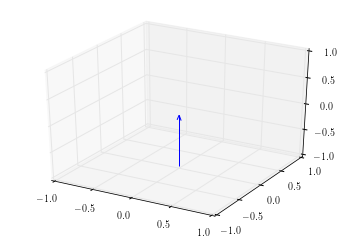

In [52]:
pts_x_ini = np.array([0])
pts_y_ini = np.array([0])
pts_z_ini = np.array([0])
pts_x_fin = np.array([0])
pts_y_fin = np.array([0])
pts_z_fin = np.array([1])
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(0,0,0,0,0,10,length=1.0, arrow_length_ratio = .1)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

In [47]:
ax.quiver?

#### Vector FIeld

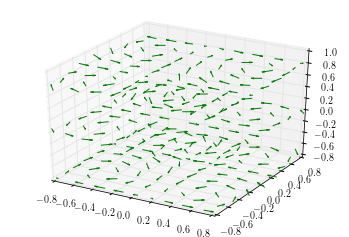

In [53]:
xc, yc, zc = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = np.sin(np.pi * xc) * np.cos(np.pi * yc) * np.cos(np.pi * zc)
v = -np.cos(np.pi * xc) * np.sin(np.pi * yc) * np.cos(np.pi * zc)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * xc) * np.cos(np.pi * yc) *
     np.sin(np.pi * zc))
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(xc, yc, zc, u, v, w, length=0.1, color = 'g')

plt.show()

#### Campo vectorial Eléctroestático

ValueError: shape mismatch: objects cannot be broadcast to a single shape

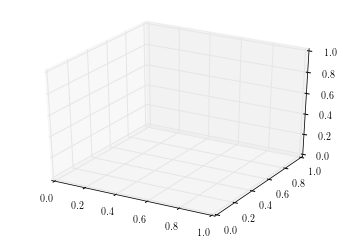

In [56]:
xr,yr,zr = np.meshgrid(np.arange(-1,1,.1),np.arange(-1,1,.1),np.arange(-1,1,.1))
theta = np.linspace(0,np.pi,100)
phi = np.linspace(0,2*np.pi,100)
r = 1/np.sqrt(xr**2+yr**2+zr**2)
fig = plt.figure()
U,V,W = np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)
ax = fig.add_subplot(111,projection = '3d')
ax.quiver(xr,yr,zr, U,V,W, length=0.2, color = 'b')

### 2D plots inside 3D plots

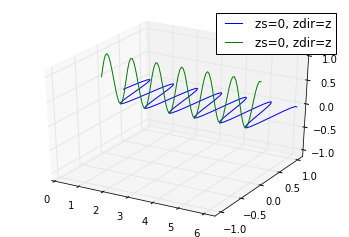

In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d')

Ex = np.linspace(0, 2*np.pi, 100)
Ey = np.sin(Ex * 2 * np.pi) / 2 + 0.5
ax.plot(Ex, Ey, zs=0, zdir='z', label='zs=0, zdir=z')


Bx = np.linspace(0, 2*np.pi, 100)
By = np.sin(Bx * 2 * np.pi) / 2 + 0.5
ax.plot(Bx, By, zs=0, zdir='y', label='zs=0, zdir=z')



#colors = ('r', 'g', 'b', 'k')
#for c in colors:
#    x = np.random.sample(200)
#    y = np.random.sample(200)
#    ax.scatter(x, y, 0, zdir='y', c=c, alpha = 0.2)

ax.legend()
ax.set_xlim3d(0, 2*np.pi)
ax.set_ylim3d(-1.1, 1.1)
ax.set_zlim3d(-1.1, 1.1)

plt.show()

In [25]:
fig.gca?

### Fill_Between in 3D plots

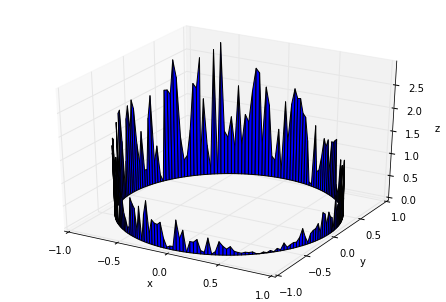

In [26]:
import math as mt
import matplotlib.pyplot as pl
import numpy as np
import random as rd

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# Parameter (reference height)
h = 0.0

# Code to generate the data
n = 200
alpha = 0.75 * mt.pi
theta = [alpha + 2.0 * mt.pi * (float(k) / float(n)) for k in range(0, n + 1)]
xs = [1.0 * mt.cos(k) for k in theta]
ys = [1.0 * mt.sin(k) for k in theta]
zs = [abs(k - alpha - mt.pi) * rd.random() for k in theta]

# Code to convert data in 3D polygons
v = []
for k in range(0, len(xs) - 1):
    x = [xs[k], xs[k+1], xs[k+1], xs[k]]
    y = [ys[k], ys[k+1], ys[k+1], ys[k]]
    z = [zs[k], zs[k+1],       h,     h]
    v.append(zip(x, y, z))
poly3dCollection = Poly3DCollection(v)

# Code to plot the 3D polygons
fig = pl.figure()
ax = Axes3D(fig)
ax.add_collection3d(poly3dCollection)
ax.set_xlim([min(xs), max(xs)])
ax.set_ylim([min(ys), max(ys)])
ax.set_zlim([min(zs), max(zs)])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

pl.show()

### Putting text inside the plots

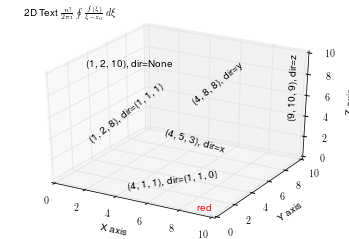

In [40]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.rc('text', usetex=True)
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = (1, 4, 4, 9, 4, 1)
ys = (2, 5, 8, 10, 1, 2)
zs = (10, 3, 8, 9, 1, 8)

for zdir, x, y, z in zip(zdirs, xs, ys, zs):
    label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)
    ax.text(x, y, z, label, zdir)

plt.rc('text', usetex=True)
ax.text(9, 0, 0, "red", color='red')
ax.text2D(0.05, 0.95, r"2D Text $\frac{n!}{2\pi i}\oint \frac{f(\xi)}{\xi-z_0}\,d\xi$", transform=ax.transAxes)

ax.set_xlim3d(0, 10)
ax.set_ylim3d(0, 10)
ax.set_zlim3d(0, 10)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [41]:
ax.transAxes?

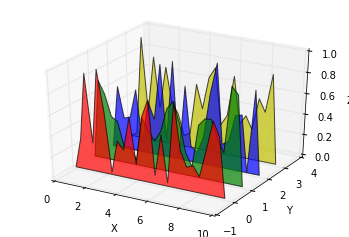

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


def cc(arg):
    return colorConverter.to_rgba(arg, alpha=0.6)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()
